# Project : Brazil Medical Appointments Data Analysis

## Introduction

We are going to take a look of a dataset that collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. The source of the project reside on Kaggle. 

In [155]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
% matplotlib inline

med_meet = pd.read_csv('no-show-appointments.csv')
med_meet.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Data Wrangling

In [156]:
# Check the datatypes of each variables
med_meet.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

Problems with dataset
1. Appointment Day has impropriate datatypes
2. Schedule Day has impropriate datatypes 
3. For gender and no-show can change to categorical datatypes seperating between F & M and No & Yes
4. Typo in Hipertension , Handcap
5. Confusing name 'No-show' , 'Scholarship' , 'SMS_received'
6. 'Scholarship' , 'Hipertension' , 'Diabetes' , 'Alcoholism' , 'Handcap' , 'SMS_received' has impropriates datatypes since it has 0 & 1 only.

In [157]:
# Check for duplication in med_meet dataset
sum(med_meet.duplicated())

0

In [158]:
# Rename the error "Hipertension" to 'Hypertension'
med_meet = med_meet.rename(columns = {'Hipertension' : 'Hypertension'})


In [159]:
# Rename the error 'Handcap' to 'Handicap'
med_meet = med_meet.rename(columns = {'Handcap' : 'Handicap'})

In [160]:
# Rename the confusing 'No-show' to 'Absent'
med_meet = med_meet.rename(columns = {'No-show' : 'Absent'})

In [161]:
# Simplify 'SMS_received' to 'SMS'
med_meet = med_meet.rename(columns = {'SMS_received' : 'SMS'})

In [162]:
# Simplify 'Scholarship' to 'Bolsa'
med_meet = med_meet.rename(columns = {'Scholarship' : 'Bolsa'})

In [163]:
# Check the amount of null values in the dataframe
med_meet.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Bolsa             0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS               0
Absent            0
dtype: int64

In [164]:
# Get more info regarding the dataframe
med_meet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Bolsa             110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS               110527 non-null int64
Absent            110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [165]:
# Check if there is another unique values other than 'Yes' or 'No'
len(med_meet['Absent'].unique().tolist())

2

In [166]:
# Check if there is another unique values other than 'M' or 'F'
len(med_meet['Gender'].unique().tolist())

2

In [167]:
# Convert 'ScheduledDay' datas from String Datatypes to Datetime datatypes
# Reference : https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html
med_meet['ScheduledDay'] = pd.to_datetime(med_meet['ScheduledDay'])

In [168]:
# Check the ScheduledDay datatypes
med_meet.dtypes

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay            object
Age                        int64
Neighbourhood             object
Bolsa                      int64
Hypertension               int64
Diabetes                   int64
Alcoholism                 int64
Handicap                   int64
SMS                        int64
Absent                    object
dtype: object

In [169]:
# Convert 'AppointmentDay' datas from String Datatypes to Datetime datatypes
med_meet['AppointmentDay'] = pd.to_datetime(med_meet['AppointmentDay'])

In [170]:
# Check the AppointmentDay datatpes
med_meet.dtypes

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Bolsa                      int64
Hypertension               int64
Diabetes                   int64
Alcoholism                 int64
Handicap                   int64
SMS                        int64
Absent                    object
dtype: object

In [171]:
# Convert the 'Gender' datatypes from String datatypes to Categorical datatypes since it has only 'F' & 'M'
med_meet['Gender'] = med_meet['Gender'].astype('category')

In [172]:
# List out the unique values in Gender Data
med_meet['Gender'].unique().tolist()

['F', 'M']

In [173]:
# Check the Gender datatypes
med_meet.dtypes

PatientId                float64
AppointmentID              int64
Gender                  category
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Bolsa                      int64
Hypertension               int64
Diabetes                   int64
Alcoholism                 int64
Handicap                   int64
SMS                        int64
Absent                    object
dtype: object

In [174]:
# List out the unique values in Gender Data
med_meet['Absent'].unique().tolist()

['No', 'Yes']

In [175]:
# Convert the 'Absent' datatypes from String datatypes to Categorical datatypes since it has only 'No' & 'Yes'
med_meet['Absent'] = med_meet['Absent'].astype('category')

In [176]:
# Check the Absent datatypes
med_meet.dtypes

PatientId                float64
AppointmentID              int64
Gender                  category
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Bolsa                      int64
Hypertension               int64
Diabetes                   int64
Alcoholism                 int64
Handicap                   int64
SMS                        int64
Absent                  category
dtype: object

In [177]:
# Convert 'Bolsa' Datatypes from Integer datatypes to Boolean datatypes
med_meet['Bolsa'] = med_meet['Bolsa'].astype('bool')

In [178]:
# Check the 'Bolsa' datatypes
med_meet['Bolsa'].dtype

dtype('bool')

In [179]:
# Convert 'Hypertension' Datatypes from Integer datatypes to Boolean datatypes
med_meet['Hypertension'] = med_meet['Hypertension'].astype('bool')

In [180]:
# Check the 'Hypertension' datatypes
med_meet['Hypertension'].dtype

dtype('bool')

In [181]:
# Convert 'Diabetes' Datatypes from Integer datatypes to Boolean datatypes
med_meet['Diabetes'] = med_meet['Diabetes'].astype('bool')

In [182]:
# Check the 'Diabetes' datatypes
med_meet['Diabetes'].dtype

dtype('bool')

In [183]:
# Convert 'Alcoholism' Datatypes from Integer datatypes to Boolean datatypes
med_meet['Alcoholism'] = med_meet['Alcoholism'].astype('bool')

In [184]:
# Check the 'Alcoholism' datatypes
med_meet['Alcoholism'].dtype

dtype('bool')

In [185]:
# Convert 'Handicap' Datatypes from Integer datatypes to Boolean datatypes
med_meet['Handicap'] = med_meet['Handicap'].astype('bool')

In [186]:
# Check the 'Handicap' datatypes
med_meet['Handicap'].dtype

dtype('bool')

In [187]:
# Convert 'SMS' Datatypes from Integer datatypes to Boolean datatypes
med_meet['SMS'] = med_meet['SMS'].astype('bool')

In [188]:
# Check the 'SMS' datatypes
med_meet['SMS'].dtype

dtype('bool')

In [189]:
# Check the datatypes of all the variables
med_meet.dtypes

PatientId                float64
AppointmentID              int64
Gender                  category
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Bolsa                       bool
Hypertension                bool
Diabetes                    bool
Alcoholism                  bool
Handicap                    bool
SMS                         bool
Absent                  category
dtype: object

# Exploratory Data Analysis

Here, we are going to explore the dataset. The independent variable are age, patients receiving SMS and patients receiving Bolsa and our dependent variable is absentee of patients 

##  Reseach Question 1 : How do each age cohort responds to medical appointments ?

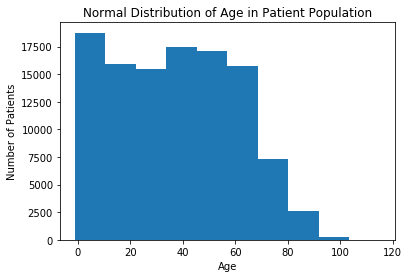

In [217]:
# Check the normal distribution of age in patient population
plt.hist(med_meet['Age'])
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Normal Distribution of Age in Patient Population');

In [218]:
# Organizing the age cohort
kids = med_meet.query ('Age < 13')
teenager = med_meet.query('Age > 12 & Age < 19')
young_adult = med_meet.query('Age > 18 & Age < 30')
adult = med_meet.query('Age > 29 & Age < 60')
senior = med_meet.query('Age > 60')

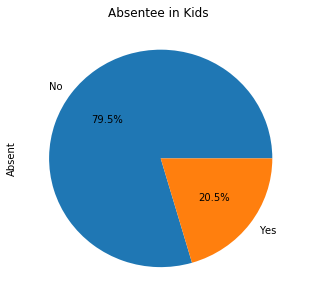

In [192]:
kids['Absent'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=[5,5], title='Absentee in Kids ');

Here, we can observe that 20.5% are absent for the medical appointments while 79.5% are present for the medical appointments

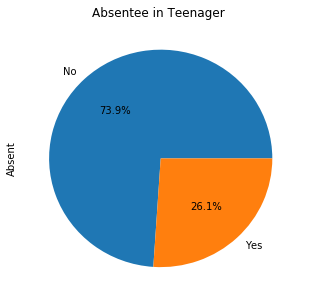

In [193]:
teenager['Absent'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=[5,5], title='Absentee in Teenager ');

Here, we can observe that 26.1% are absent for the medical appointments while 73.9 % are present for the medical appointments

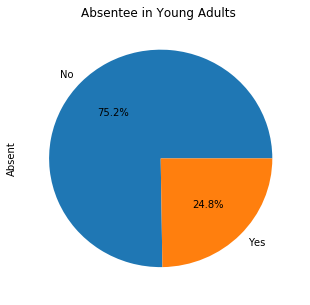

In [194]:
young_adult['Absent'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=[5,5], title='Absentee in Young Adults ');

Here, we can observe that 24.8% are absent for the medical appointments while 75.2% are present for the medical appointments

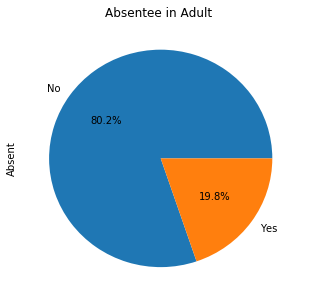

In [195]:
adult['Absent'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=[5,5], title='Absentee in Adult ');

Here, we can observe that 19.8% are absent for the medical appointment while 80.2% are present for the medical appointments.

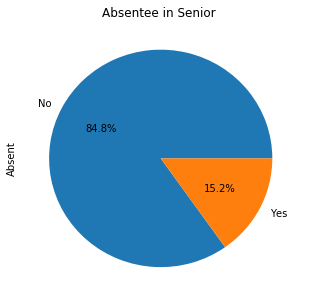

In [196]:
senior['Absent'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=[5,5], title='Absentee in Senior ');

Here, we can observe that 15.2% are absent for the medical appointment while 84.8% are present for the medical appointments.

## Research Question 2 : Does receiving SMS makes patients more likely to attend medical appointments?

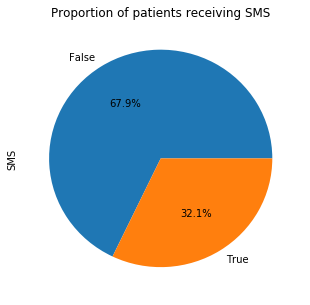

In [222]:
med_meet['SMS'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Proportion of patients receiving SMS', figsize=[5,5]);

Here , we can observe that only 32.1 % of patients received the SMS while 67.9% of patients received the SMS

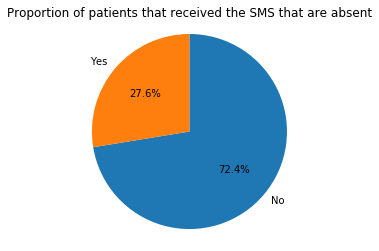

In [223]:
yes_sms = med_meet.query('SMS == 1')
sorted_counts = yes_sms['Absent'].value_counts()
plt.pie(sorted_counts,autopct='%1.1f%%',  labels = sorted_counts.index, startangle = 90,
        counterclock = False);
plt.axis('square');
plt.title('Proportion of patients that received the SMS that are absent');

Here we can observe that 27.6 % of patients that received the SMS are absent while majority are present when patients received the SMS

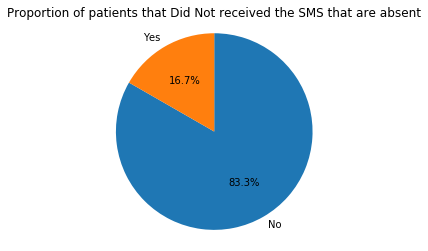

In [221]:
no_sms = med_meet.query('SMS == 0')
sorted_counts = no_sms['Absent'].value_counts()
plt.pie(sorted_counts,autopct='%1.1f%%', labels = sorted_counts.index, startangle = 90,
        counterclock = False);
plt.axis('square');
plt.title('Proportion of patients that Did Not received the SMS that are absent');

Here we can observe that 16.7% of patients that received the SMS are absent while majority are present when patients did not received the SMS.

## Research Question 3 : Does people receiving Bolsa more likely to attend the appointment?

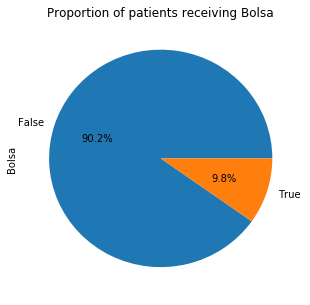

In [201]:
med_meet['Bolsa'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Proportion of patients receiving Bolsa', figsize=[5,5]);

Here we can observe that only 9.8% of patients received Bolsa while 90.2% did not received.

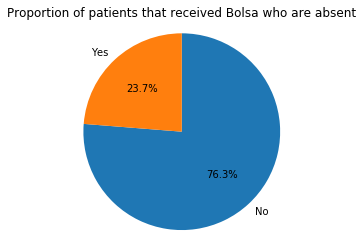

In [219]:
yes_bolsa = med_meet.query('Bolsa == 1')
sorted_counts = yes_bolsa['Absent'].value_counts()
plt.pie(sorted_counts,autopct='%1.1f%%', labels = sorted_counts.index, startangle = 90,
        counterclock = False)
plt.axis('square');
plt.title('Proportion of patients that received Bolsa who are absent');

Here, we can observe that 76.3% of patients are present when they have received Bolsa while 23.7% of patients are absent.

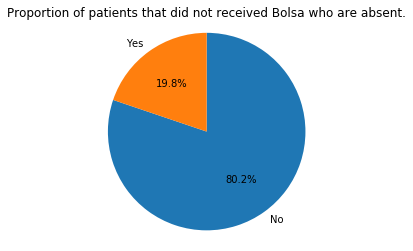

In [220]:
no_bolsa = med_meet.query('Bolsa == 0')
sorted_counts = no_bolsa['Absent'].value_counts()
plt.pie(sorted_counts,autopct='%1.1f%%', labels = sorted_counts.index, startangle = 90,
        counterclock = False);
plt.axis('square');
plt.title('Proportion of patients that did not received Bolsa who are absent.');

Here we can observe that 80.2% of patients are present when they did not received Bolsa while 19.8% of patients are absent.

# Summary

Here we have done exploratory analysis using statitistics , charts and graphs to investigate the questions that we presented. We have discovered various findings that are suprising while some are expected that would navigate us towards a better decision of practical implications.

## 1. How do each age cohort responds to medical appointments ?

Here, we have analysed that teenagers are most likely to miss appointments among each age cohort with 26.1% . We have also analysed that seniors are least likely to miss appointments among each age cohort with 15.4%. We can also oberve that young adults and adults that are absent for medical appointments are 24.8% and 19.8% respectively. 

## 2. Does receiving SMS makes patients more likely to attend medical appointments?

Suprisingly,here we have analysed that among the patients that did not received SMS has a higher percentage of patients that attend the medical appointments with 83.3% than patients that received SMS with 72.4%. Here, we can suggest a practical implication based on the evidence above to stop sending SMS to patients since it has no effective effects.

## 3. Does people receiving Bolsa more likely to attend the appointment?

Suprisingly, here we have analysed that among the patients that did not received Bolsa has a higher percentage of patients that attend the medical appointments with 80.2% than patients that received Bolsa with 76.3%. Here, we can suggest a trial of giving less Bolsa and eventally stop giving Bolsa  since it has no immediate effect when patietns are given Bolsa.

# Further Research

1. We can also look at does certain gender increases the chance of patients to miss the medical appointment? 
2. We should also make the neighbourhood data better for analysing by making it as the distance of the neighbourhood to the hospital that they are visiting then we can see if the further neighbourhood to the hospital, the more likely the patients to miss the medical appointment.
3. We can also look at does certain chronic diseases increase the chance of paitents to miss the medical appointment.